In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np 
import pandas as pd 
import xarray as xr

In [3]:
from cartopy import crs as ccrs

In [6]:
dset = xr.open_dataset('../CMORPH/cmorph_monthly_from_KNMI.nc', decode_times=False)

In [7]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 265)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 261.0 262.0 263.0 264.0
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.6.9 (http://...
    history:                    Sun Jan 12 11:45:23 2020: cdo settaxis,1998-0...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-01-10
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    CDO:                        Climate Data Operators version 1.6.9 (http://...

### we have to create a proper time index using pandas 

In [12]:
dset['time'] = pd.date_range(start='1998-1-1', periods=len(dset.time), freq='MS')

In [13]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 265)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2020-01-01
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.6.9 (http://...
    history:                    Sun Jan 12 11:45:23 2020: cdo settaxis,1998-0...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-01-10
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    CDO:                        Climate Data Operators version 1.6.9 (http://...

### restrict the domain to [110.,-40.,280.,40.] 

In [14]:
dset = dset.sel(lat=slice(-40., 40.), lon=slice(110, 360 - 40))

In [15]:
clim = dset.sel(time=slice('1998','2018'))

In [16]:
clim = clim.groupby(clim.time.dt.month).mean('time')

In [17]:
clim

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 420, month: 12)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon      (lon) float32 110.25 110.75 111.25 111.75 ... 318.75 319.25 319.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    prcp     (month, lat, lon) float32 0.6418142 0.6038453 ... 5.261313

In [18]:
anoms = dset.groupby(dset.time.dt.month) - clim

In [19]:
anoms

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 420, time: 265)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon      (lon) float32 110.25 110.75 111.25 111.75 ... 318.75 319.25 319.75
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2020-01-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12 1
Data variables:
    prcp     (time, lat, lon) float32 1.1275463 1.1150784 ... 2.3341227 2.589088

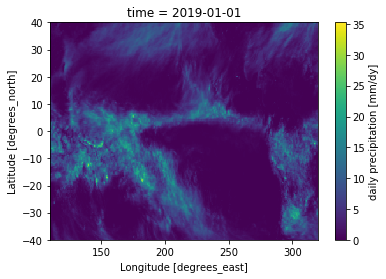

In [20]:
dset.sel(time='2019-01')['prcp'].plot()

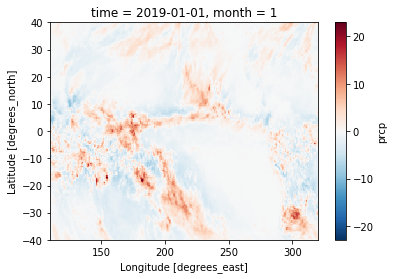

In [24]:
anoms.sel(time='2019-01')['prcp'].plot()

In [30]:
anoms.sel(time='2019-01')['prcp']

<xarray.DataArray 'prcp' (time: 1, lat: 160, lon: 420)>
array([[[-0.3347174 , -0.3007808 , -0.32729885, ...,  0.38820648,
          0.71211505,  1.8288565 ],
        [-0.34538776, -0.39443332, -0.42892998, ...,  1.9711146 ,
          2.0262022 ,  2.9661193 ],
        [-0.3647231 , -0.4351193 , -0.48914295, ...,  3.0148716 ,
          2.7932892 ,  2.6422982 ],
        ...,
        [ 0.4162978 ,  0.734425  ,  0.7606027 , ...,  0.3125596 ,
         -0.14845133,  0.25146103],
        [ 0.53344893,  0.9787824 ,  0.96671224, ...,  0.5286746 ,
          0.24726105,  0.84015226],
        [ 0.23894715,  0.7614304 ,  0.41531083, ...,  1.6256561 ,
          0.34338856,  0.5314431 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon      (lon) float32 110.25 110.75 111.25 111.75 ... 318.75 319.25 319.75
  * time     (time) datetime64[ns] 2019-01-01
    month    (time) int64 1

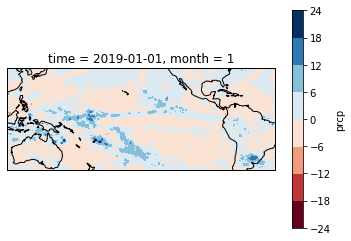

In [41]:
f, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
a = anoms.sel(time='2019-01')['prcp'][0,:,:].plot.contourf(transform=ccrs.PlateCarree(), levels=10, cmap=plt.cm.RdBu)
ax.coastlines()
cb = f.axes[1]

In [22]:
anoms_pp = dset.groupby(dset.time.dt.month) / clim

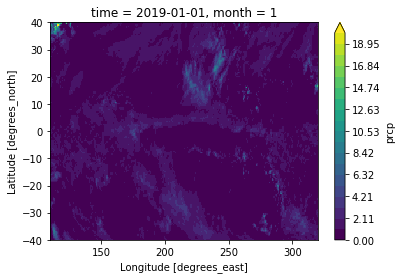

In [23]:
anoms_pp.sel(time='2019-01')['prcp'].plot(vmin=0, vmax=20, levels=20)